## Objetivo

Avaliar a mobilidade no entorno da UFRN, em Natal-RN.

- **Quais bairros analisar?** R: Capim Macio, Lagoa Nova e Candelária.

- **Onde eu poderia colocar dock-station(s) de compartilhamento de bicicletas?** R: Ruas principais onde a maioria as vias arteriais se conectam.

- **Desconsidere paradas de ônibus, tente resolver esse desafio usando o conteúdo visto nas aulas de 21 e 23 de novembro.**

## Preparando o ambiente

In [1]:
!pip install osmnx
!pip install nxviz

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Criando o grafo com os bairros que fazem parte da vizinhaça da UFRN usando o OSMNX

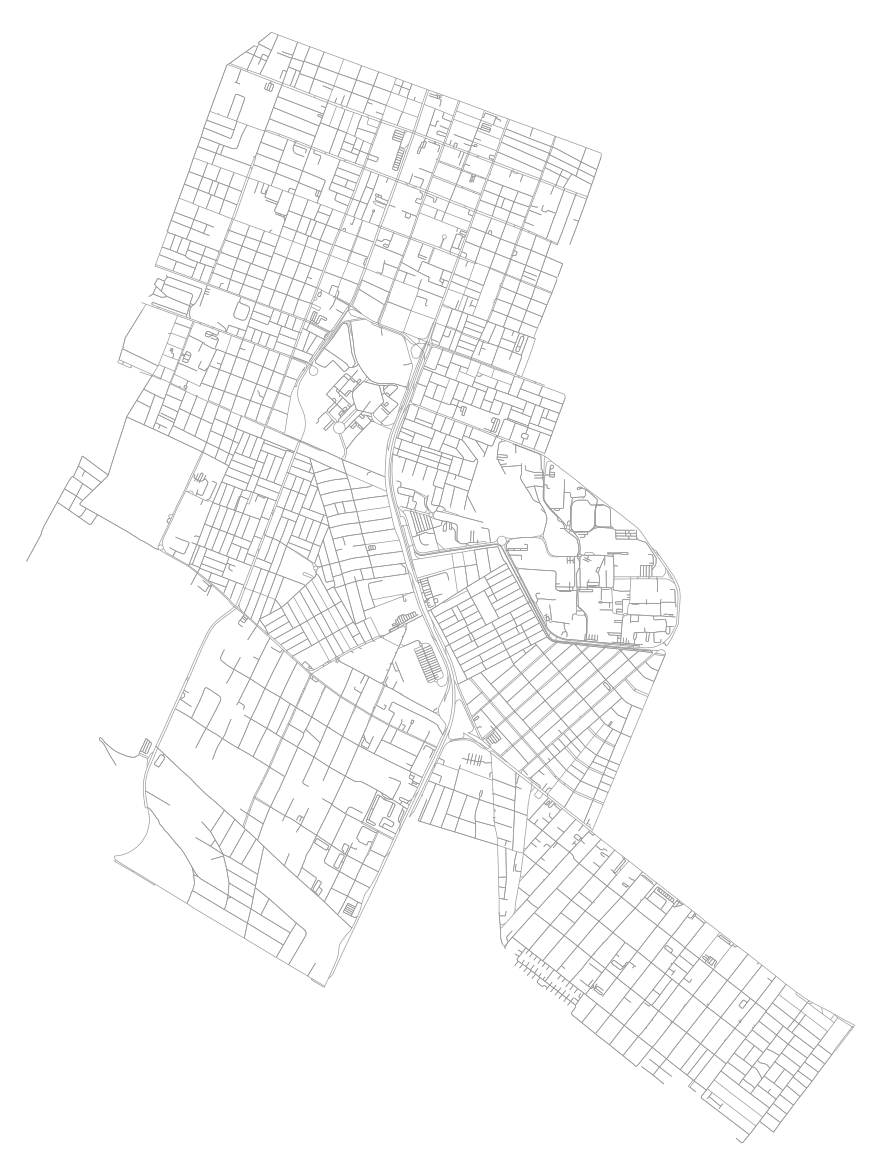

In [3]:
# Define the places you want to combine
place_names = [
    "Capim Macio, Natal, Rio Grande do Norte, Brasil",
    "Lagoa Nova, Natal, Rio Grande do Norte, Brasil",
    "Candelária, Natal, Rio Grande do Norte, Brasil",
    "Universidade Federal do Rio Grande do Norte, Natal, Rio Grande do Norte, Brasil"
]

# Initialize an empty graph to store the combined graph
graph_combined = None

# Iterate through each place and add its graph to the combined graph
for place in place_names:
    graph = ox.graph_from_place(place, network_type='bike')
    if graph_combined is None:
        graph_combined = graph  # Assign the first graph as the initial combined graph
    else:
        graph_combined = nx.compose(graph_combined, graph)  # Combine subsequent graphs

# Plot the combined graph without highlighting any specific nodes
fig, ax = ox.plot_graph(graph_combined, figsize=(15, 15), node_size=0,
                        edge_linewidth=0.5, bgcolor='white', show=False)

plt.show()  # Display the plot

### Algumas informações sobre a rede
- Exentricidade dos nós;
- Tamanho ou distância que forma o raio da rede;
- Nó central.

- Plotagem do nó central na figura formada pela UFRN e os bairros vizinhos;
- Plotagem dos nós com maior excentricidade da rede;

In [4]:
G = ox.convert.to_undirected(graph_combined)

#print(nx.eccentricity(G))
print(nx.radius(G))
#print(nx.center(G))

49


98


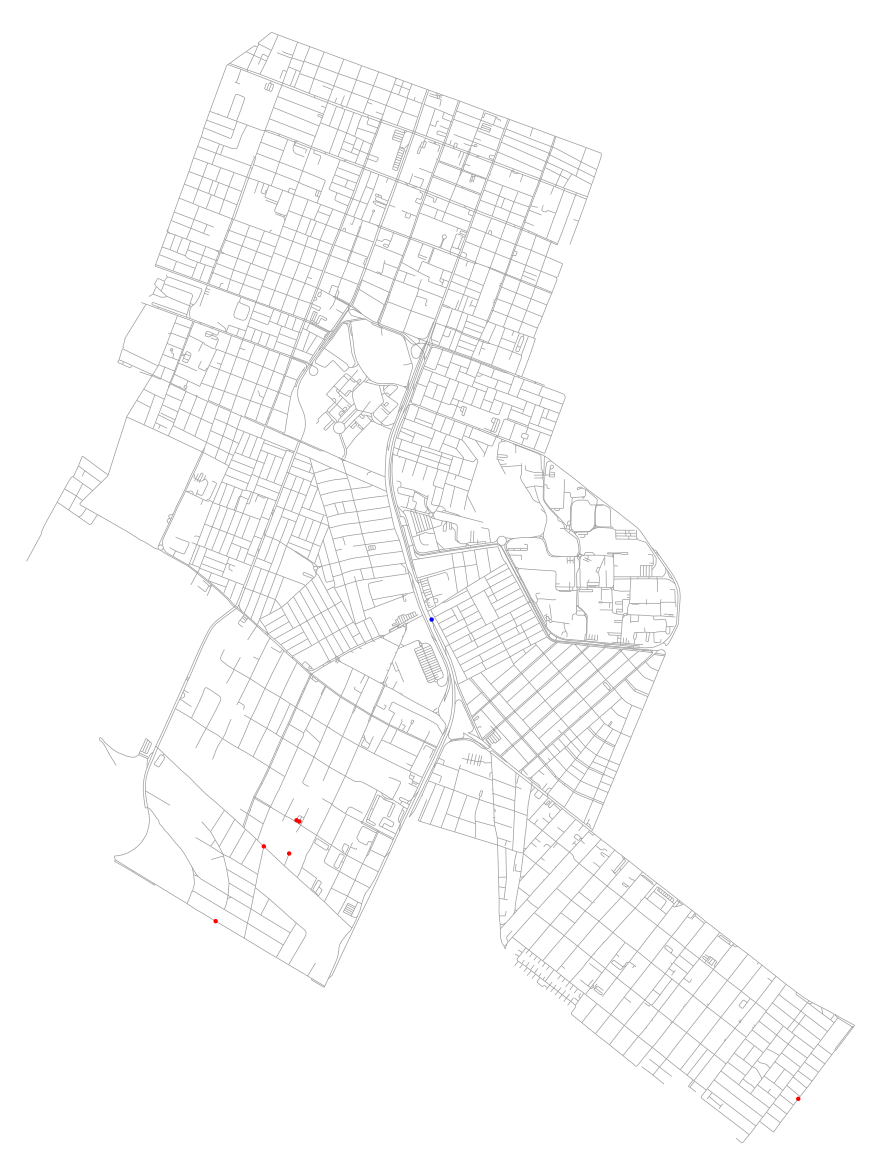

In [5]:
# prompt: plot graph G with the center node in blue and the nodes with the highest eccentricity in red

# Find nodes with the highest eccentricity
eccentricity = nx.eccentricity(G)
max_eccentricity = max(eccentricity.values())
print(max_eccentricity)
highest_eccentricity_nodes = [node for node, ecc in eccentricity.items() if ecc == max_eccentricity]
center_nodes = nx.center(G)

# Create a node color map
node_color = ['b' if node in center_nodes else 'r' if node in highest_eccentricity_nodes else 'none' for node in G.nodes()]

# Plot the undirected graph with the center node in blue and highest eccentricity nodes in red
fig, ax = ox.plot_graph(G, figsize=(15, 15), node_size=10,
                        edge_linewidth=0.5, bgcolor='white', node_color=node_color, show=False)

plt.show()

## Estudo da rede usando as métricas de centralidade

### Degree centrality

A rede é plotada de forma a facilitar a visualização dos nós e possibilitar a diferenciabilidade deles baseado no grau de centralidade por grau. Para o conceito de cidades é possível exemplificar a centralidade por grau de um nó como um cruzamento ou localidade onde muitas ruas e avenidas se coenctam.

Os nós com as cores mais escuras são nós que possuem um grau de centralidade por grau normalizado mais baixo, ou seja, são nós que possuem um grau baixo; Os nós com as cores mais quentes são nós com um grau de centralidade maior o que indica que possuem um grau maior.

Para a rede mostrada abaixo é possível observar que a maioria dos nós dentro da UFRN e ao redor dela são nós com grau de centralidade por grau médio ou baixo, indicando que há alguns caminhos que podem ser boas escolhas para trafegar com bicicletas e outros caminhos que não são tão variados.


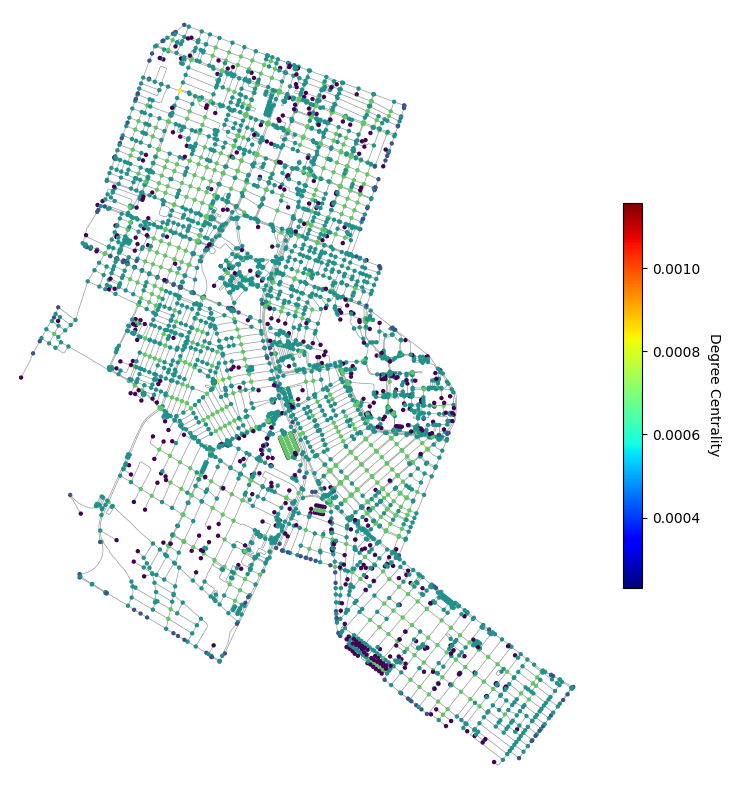

In [6]:
import matplotlib as mpl

G = ox.convert.to_undirected(graph_combined)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Get node colors based on degree centrality
node_colors = [degree_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by degree centrality
fig, ax = ox.plot_graph(
    G,
    figsize=(10, 10),
    node_size=10,
    edge_linewidth=0.5,
    bgcolor="white",
    node_color=node_colors,
    #cmap=plt.cm.jet,  # Use a colormap for the nodes
    show=False,
)

# Create a ScalarMappable for the colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessary to avoid errors with the ScalarMappable

# Add the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Degree Centrality', rotation=270, labelpad=15)

plt.axis("off")
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

### Closeness centrality

O cálculo da centralidade por proximidade de um nó é feito calculando a média das distâncias de um nó a todos os outros.

Para esta métrica os nós com cores mais escuras são nós que estão em média, mais distantes de todos os outros nós da rede e os nós com cores mais claras são nós que estão em média, próximos dos outros nós da rede.

Na visualização dos bairros selecionados, os nós mais escuros se encontram nas bordas dos bairros de Campim Macio, Candelária e Lagoa Nova. Entre os bairros de Lagoa Nova e Candelária estão os nós com um grau de centralidade maior como é possível ver na imagem. Utilizar o grau de centralidade por proiximidade para analisar uma rede onde a UFRN está físicamente centrada pode ser bem útil.

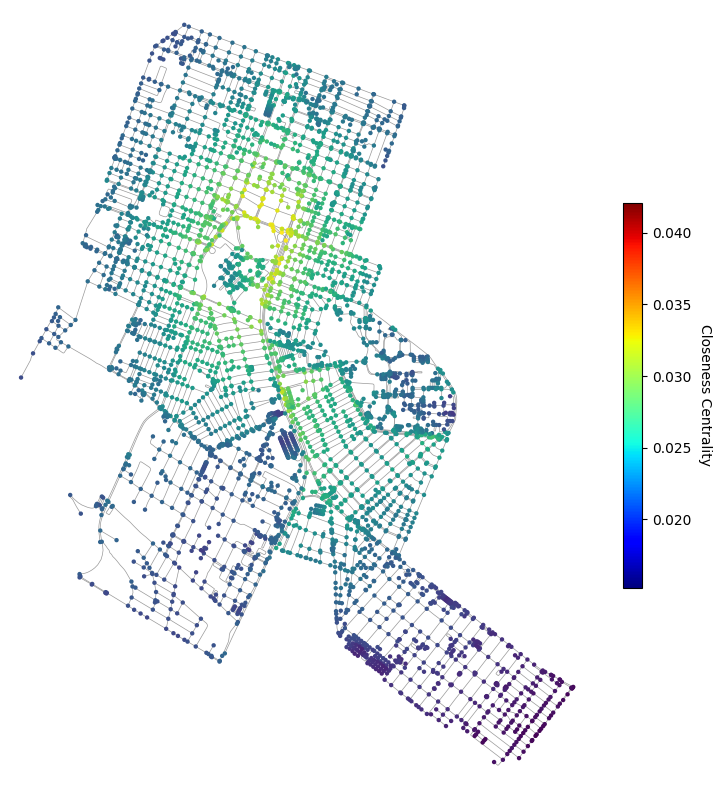

In [7]:
# prompt: Use o código da última célula como exemplo para plotar o grafo G usando o OMNSX com a barra de cores usando o matplorlib onde as cores dos nós são definidas baseado na propriedade closeness_centrality(G)

# G = ox.convert.to_undirected(graph_combined)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get node colors based on closeness centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by closeness centrality
fig, ax = ox.plot_graph(
    G,
    figsize=(10, 10),
    node_size=10,
    edge_linewidth=0.5,
    bgcolor="white",
    node_color=node_colors,
    #cmap=plt.cm.jet,  # Use a colormap for the nodes
    show=False,
)

# Create a ScalarMappable for the colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessary to avoid errors with the ScalarMappable

# Add the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Closeness Centrality', rotation=270, labelpad=15)

plt.axis("off")
plt.savefig('closeness.png', transparent=True,dpi=300)
plt.show()

### Betweenness centrality

A rede é plotada de forma a facilitar a visualização dos nós e possibilitar a diferenciabilidade deles baseado no grau de centralidade *betweenness*. De acordo com a documetação do NetworkX, a função betweenness_centrality calcula para todos os nós a soma das frações dos menores caminhos de cada par de nó que pasas por um nó. Ou seja, se um nó tem um grau alto, há vários caminhos referentes ao cojunto de par de nós da rede que passam por esses nó.

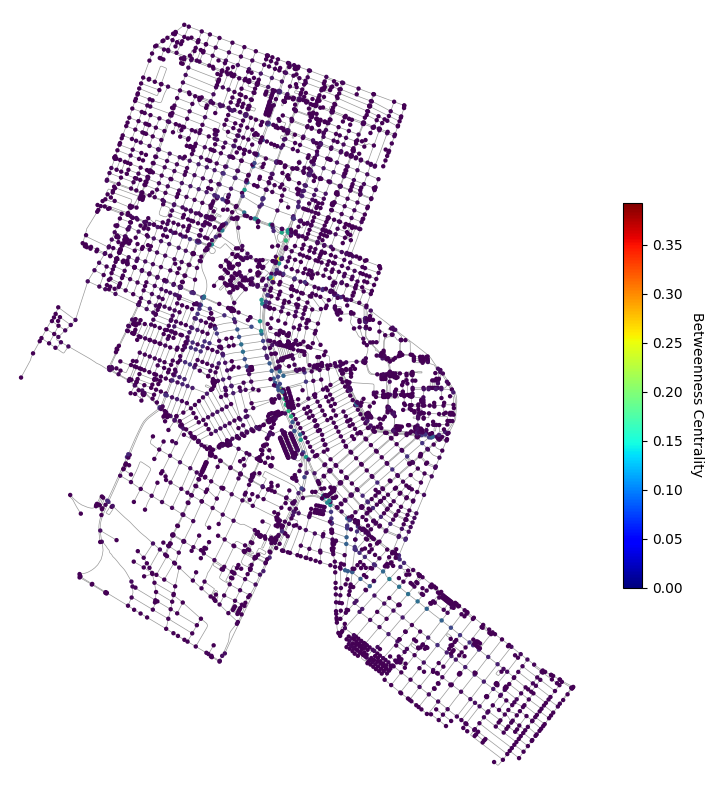

In [8]:
# prompt: # prompt: Use o código da última célula como exemplo para plotar o grafo G usando o OMNSX com a barra de cores usando o matplorlib onde as cores dos nós são definidas baseado na propriedade betweenness_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Get node colors based on betweenness centrality
node_colors = [betweenness_centrality[node] for node in G.nodes()]

# Plot the graph with nodes colored by betweenness centrality
fig, ax = ox.plot_graph(
    G,
    figsize=(10, 10),
    node_size=10,
    edge_linewidth=0.5,
    bgcolor="white",
    node_color=node_colors,
    #cmap=plt.cm.jet,  # Use a colormap for the nodes
    show=False,
)

# Create a ScalarMappable for the colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessary to avoid errors with the ScalarMappable

# Add the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Betweenness Centrality', rotation=270, labelpad=15)

plt.axis("off")
plt.savefig('betweenness.png', transparent=True,dpi=300)
plt.show()

### Eigenvector centrality

A centralidade por autovetor é a calculada baseada nos valores de centralidades dos vizinho de um nó. Ou seja, para calcula a centralidade de autovetor de um nó, é necessário calcular a soma das centralidades dos vizinhos deste nó. Assim, a centralidade de autovetor depende da classificação das centralidades dos vizinhos de um nó.

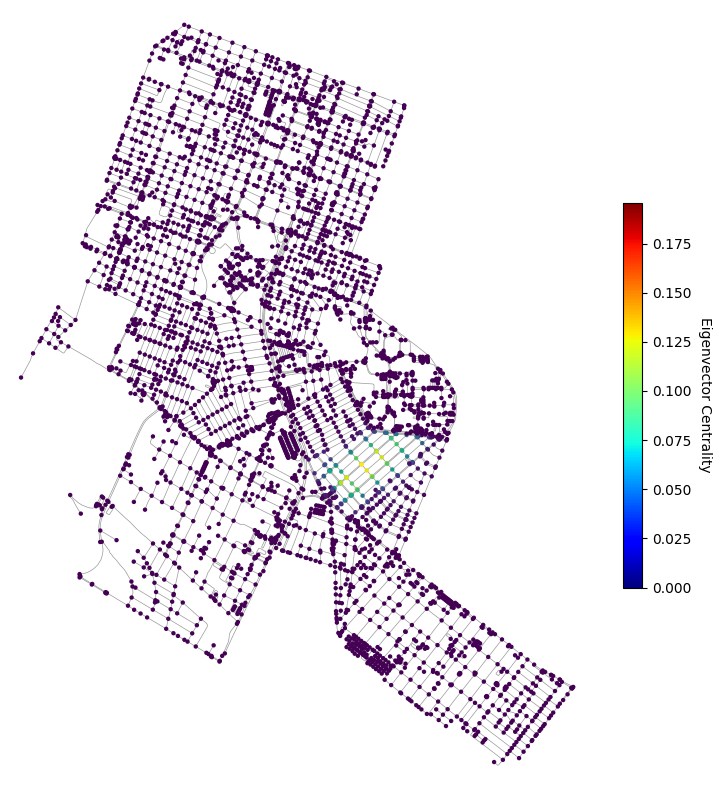

In [9]:
# Calculate eigenvector centrality
G_und = nx.Graph(G)  # Convert G to an undirected graph
eigenvector_centrality = nx.eigenvector_centrality(G_und, max_iter=500)

# Get node colors based on eigenvector centrality
node_colors = [eigenvector_centrality[node] for node in G_und.nodes()]

# Create a new graph with simplified edges
# Instead of nx.Graph(), use nx.MultiGraph() to preserve edge keys if they exist in G
H = nx.MultiGraph(G_und) # Change this line to use MultiGraph

# Copy the 'crs' attribute from G (or G_und) to H if it exists
if 'crs' in G.graph:
    H.graph['crs'] = G.graph['crs']
elif 'crs' in G_und.graph:
    H.graph['crs'] = G_und.graph['crs']
else:
    # If 'crs' is not found in G or G_und, you need to define it.
    # For example, if you know your data is in WGS 84, you can use:
    H.graph['crs'] = 'epsg:4326' # Assuming WGS 84


# Now plot the simplified graph H
fig, ax = ox.plot_graph(
    H,  # Use the simplified graph H
    figsize=(10, 10),
    node_size=10,
    edge_linewidth=0.5,
    bgcolor="white",
    node_color=node_colors,
    show=False,
)

# Create a ScalarMappable for the colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessary to avoid errors with the ScalarMappable

# Add the colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Eigenvector Centrality', rotation=270, labelpad=15)

plt.axis("off")
plt.savefig('eigenvector.png', transparent=True,dpi=300)
plt.show()

### Análise e visualização dos grafos

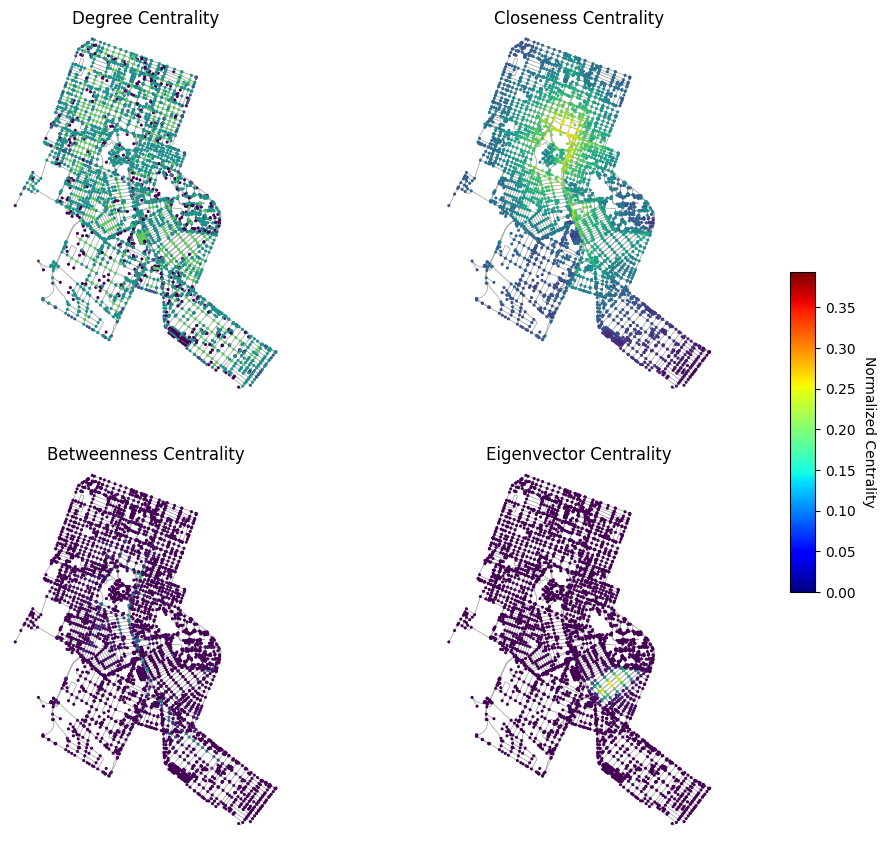

In [10]:
# prompt: Plote uma imagem com os quatro grafos de centralidades e uma barra de cores referente a centralidade normalizada para as quatro métricas.

import matplotlib.pyplot as plt
import matplotlib as mpl

# max value of metrics
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(G_und, max_iter=500).items()]),
                      max([v for k, v in nx.degree_centrality(G).items()]),
                      max([v for k, v in nx.closeness_centrality(G).items()]),
                      max([v for k, v in nx.betweenness_centrality(G).items()])])

# Normalize the centrality values for color mapping
norm = plt.Normalize(vmin=0, vmax=max_centrality)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# color of nodes
color_degree = list(dict(nx.degree_centrality(G)).values())
color_closeness = list(dict(nx.closeness_centrality(G)).values())
color_betweenness = list(dict(nx.betweenness_centrality(G)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(G_und, max_iter=500)).values())


max_centrality = max([max(color_degree),
                      max(color_closeness),
                      max(color_betweenness),
                      max(color_eigenvector)])

# Plot each centrality measure
pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Degree Centrality
node_colors_degree = [degree_centrality[node] for node in G.nodes()]
fig, ax[0, 0] = ox.plot_graph(G, node_color=node_colors_degree,
                             show=False, edge_linewidth=0.5,
                             node_size=5, bgcolor='white', ax=ax[0, 0])

ax[0, 0].set_title("Degree Centrality") # Correct the title
ax[0, 0].axis("off")

# Closeness Centrality
node_colors_closeness = [closeness_centrality[node] for node in G.nodes()]
fig, ax[0, 1] = ox.plot_graph(G, node_color=node_colors_closeness,
                             show=False, edge_linewidth=0.5,
                             node_size=5, bgcolor='white', ax=ax[0, 1])
ax[0, 1].set_title("Closeness Centrality")
ax[0, 1].axis("off")

# Betweenness Centrality
node_colors_betweenness = [betweenness_centrality[node] for node in G.nodes()]
fig, ax[1, 0] = ox.plot_graph(G, node_color=node_colors_betweenness,
                             show=False, edge_linewidth=0.5,
                             node_size=5, bgcolor='white', ax=ax[1, 0]) # Add zorder for better visualization
ax[1, 0].set_title("Betweenness Centrality")
ax[1, 0].axis("off")

# Eigenvector Centrality
node_colors_eigenvector = [eigenvector_centrality[node] for node in G.nodes()]
fig, ax[1, 1] = ox.plot_graph(G, node_color=node_colors_eigenvector,
                             show=False, edge_linewidth=0.5,
                             node_size=5, bgcolor='white', ax=ax[1, 1]) # Add zorder for better visualization
ax[1, 1].set_title("Eigenvector Centrality")
ax[1, 1].axis("off")


# Create a single colorbar for all subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar = plt.colorbar(sm, cax)
cbar.set_label('Normalized Centrality', rotation=270, labelpad=15)

plt.savefig('alltogether.png', transparent=True, dpi=600, bbox_inches="tight")
plt.show()

Fazendo uma valiação geral com base nas quatro representações gráficas de cada centralidade é possível inferir algumas possibilidades de instalação dos pontos de compartilhamento de bicicletas.

A partir da rede feita com as métricas de centralidade por grau do nó é possível ver que dentro da UFRN e nas vias ao redor dela há nós com vários caminhos - Centralidade por grau de aproximadamente 0.030 -, então, nestes lugares é possível instalar os pontos de compartilhamentos de bicicleta pois são pontos de fácil acesso e circulação.

A partir a da rede feita com as métricas de centralidade por proximidade é possível ver que os nós com baixo grau de centralidade são nós mais distantes da UFRN. Nesta rede a universidade não está exatamente no centro porém está próxima, possibilitando então fazer estimativas de pontos estratégicos. Colocar as estações de compartilhamento de bicicleta nas extremidades da rede - nas extremidades norte, oeste e sul da rede, ou seja, na extremidade dos bairros - iria possibilitar o livre circulação da população e uma menor lotação de transporte público. Utilizando as informações da primeira rede é possivel visualizar as avenidas/ruas estratégicas para terem as estações, como as ruas  com mais acesso - maior centralidade por grau.

Analisando a rede feita com a métrica *betweeness centrality* é possível ver que para os três bairros avaliados, os trechos com maior grau foram os nós que estão presentes na Av. Salgado filho, Nevaldo Rocha e Av. Engenheiro roberto Freire. Pontos de compartilhamento de bicicletas nestas avenidas podem ser avaliados pois são avenidas muito moviemetadas que passam por zonas residenciais e comerciais.

## Centrality Distributions

Avalindo como a centralidade é distribuída entre os nós em grandes redes é necessário uma análise estatística.

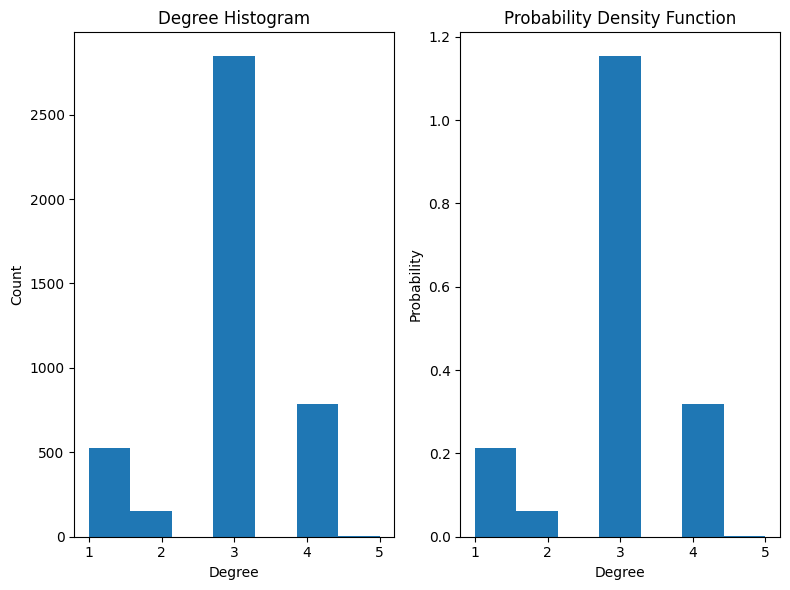

In [11]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

No gráfico de quantidade de nós por grau é possível ver que há uma número maior de nós com grau 3 e o segundo gráfico mostra os valores da densidade de probabilidade por grau.

In [12]:
# prompt: find node with highest degree() in G graph, show degree

# Find the node with the highest degree
highest_degree_node = max(G.degree(), key=lambda x: x[1])

# Print the node and its degree
print("Node with highest degree:", highest_degree_node[0])
print("Degree:", highest_degree_node[1])

Node with highest degree: 503426508
Degree: 5


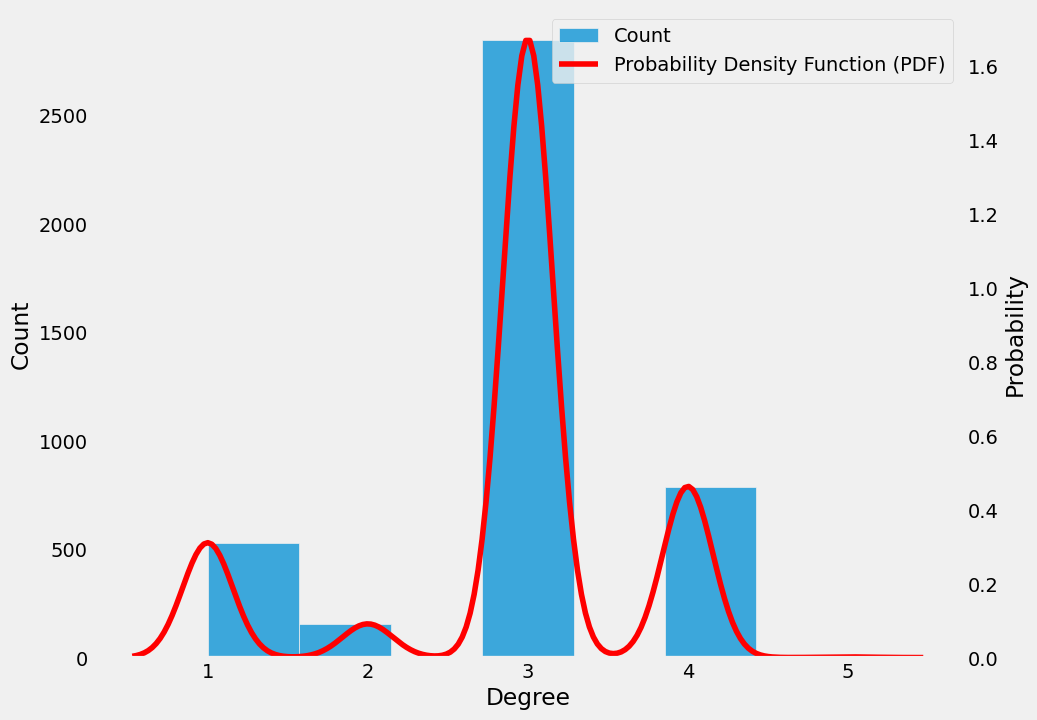

In [13]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

No gráfico abaixo é possível ver a curva da função de densidade de probabilidade junto com o histograma da contagem de nós por grau em uma só imagem.

In [14]:
five_degree_nodes = [node for node, degree in G.degree() if degree == 5]
print(five_degree_nodes)

[503426508, 501791803, 505492279]


No gráfico abaixo é mostrado a curva da densidade cumulativa em conjuto com o histograma de contagem de nós por grau. É possível ver que boa parte da densidade se dá pela quantidade de nós com grau três e uma pequena fração se dá por nós com grau cinco.

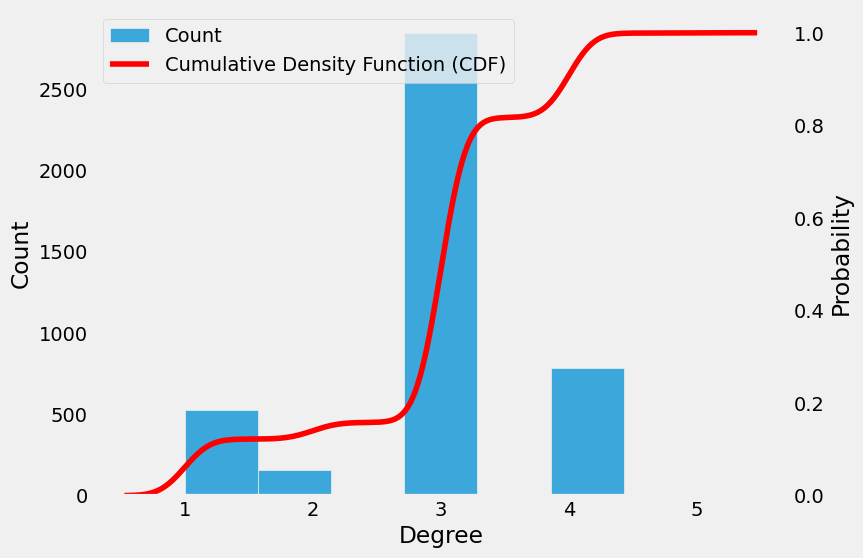

In [15]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Centrality x Centrality

Plotando os gráficos com base nos graus de centralidade e como cada métrica se relaciona com as outras é possível fazer uma análise complementar do que foi visto ao exibir as redes anteriormente.

In [16]:
bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))
ec = pd.Series(nx.eigenvector_centrality(G_und, max_iter=500))
cc = pd.Series(nx.closeness_centrality(G))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

Betweenness    Degree   EigenVector  Closeness
0     0.218500  0.000695  1.252677e-03   0.034501
1     0.000024  0.000463  7.962528e-10   0.016200
2     0.013132  0.000695  1.132267e-03   0.034420
3     0.020022  0.000695  3.153381e-04   0.032765
4     0.002479  0.000695  1.858687e-04   0.031874

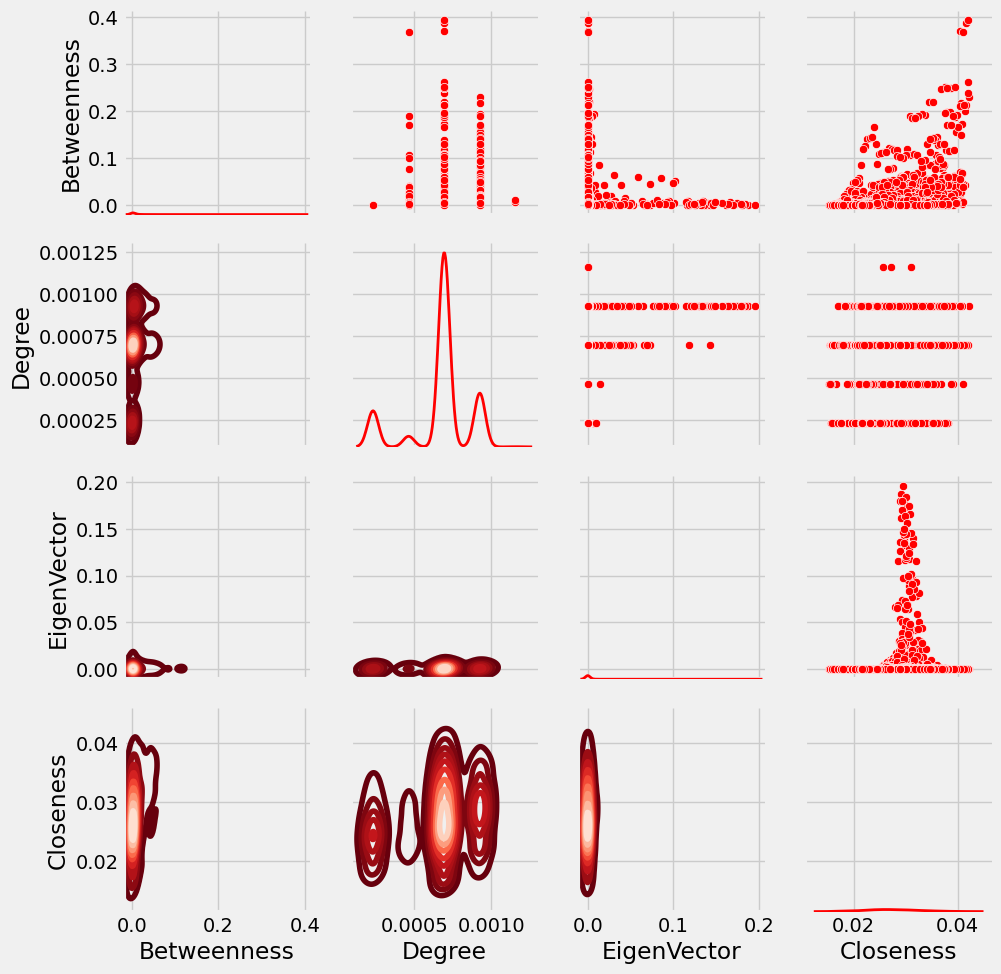

In [17]:
fig = sns.PairGrid(df)
#fig.map_upper(sns.kdeplot, cmap="Reds_r")
fig.map_upper(sns.scatterplot, color="red")
#fig.map_lower(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False, color="red")

plt.savefig('all_metrics.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

### Betweenness



## Core Decomposition

In [18]:
# Remove self-loops from the graph G_und
G_und.remove_edges_from(nx.selfloop_edges(G_und))

print("k-core existentes na rede G_und: ", set([v for k,v in nx.core_number(G_und).items()]))

k-core existentes na rede G_und:  {1, 2}


In [19]:
# Now you can calculate the core numbers
max_core = max(set([v for k,v in nx.core_number(G_und).items()]))

In [20]:
# Change the variable core to visualize the nodes in k-core
# Note that 0-core is the all network
#core = 3
#for i in nx.k_core(G_und, 2):
  #print(i)

In [21]:
# Change the variable shell to visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, however they are not member of (k+1)-core
#shell = 3
#for i in nx.k_shell(G_und ,max_core):
#  print(i)

O k-core de uma rede é o subgrupo de nós que possuem pelo menos k ligações entre si. Para uma rede referente às vias de uma cidade ou bairros como é o caso deste estudo é de se esperar que a rede não possua um k-core máximo alto dado que não é comum ver um grupo ruas que conectam pontos entre si.

Como é possível ver no gráfico anterior que relaciona quantidade de graus por nó, o grau máximo da rede é 5, porém, o k-core máximo da rede é 2. Além de que os k-cores da rede só podem ser calculados em redes unidirecionais, sem loops pois função core_number não está implementada para multi-grafos. Por isso foi utilizado o grafo G_und que é o grafo G tranformado em unidirecional e os loops foram removidos.

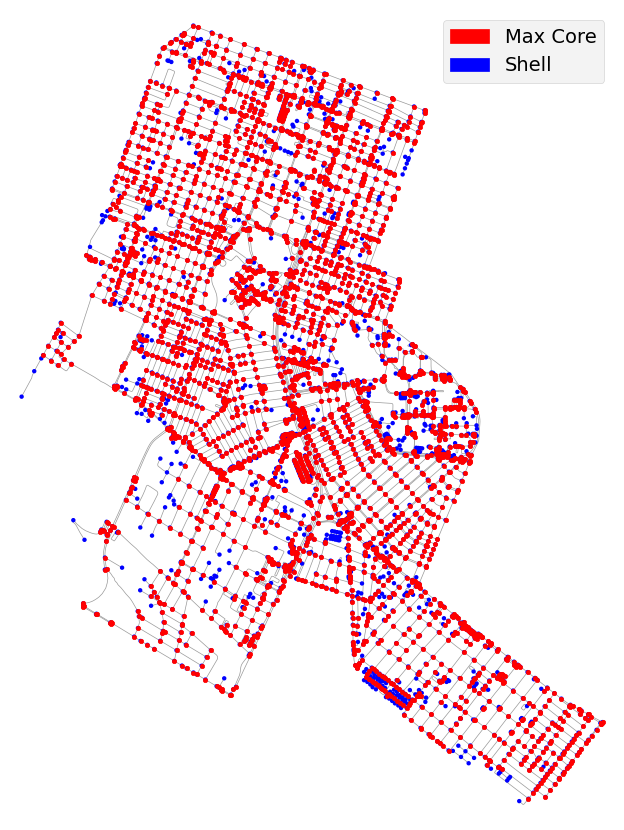

In [22]:
# prompt: Plote o grafo G com os nós presentes no core máximo da rede em vermelho e os nós do shell em azul plote com labels identificando as cores

import matplotlib.patches as mpatches

fig, ax = ox.plot_graph(
    G,  # Use the simplified graph H
    figsize=(10, 10),
    node_size=10,
    edge_linewidth=0.5,
    bgcolor="white",
    node_color='blue',  # Default color for all nodes
    show=False,
)

# Draw nodes in the max core in red
nx.draw_networkx_nodes(G_und,
                       pos=pos,
                       nodelist=list(nx.k_core(G_und,2)),  # Nodes in the max core
                       node_color='red',
                       node_size=10,
                       ax=ax)

# Static legend
red_patch = mpatches.Patch(color='red', label='Max Core')
blue_patch = mpatches.Patch(color='blue', label='Shell')
plt.legend(handles=[red_patch, blue_patch])

plt.axis("off")
plt.savefig('k-core_graph.png', transparent=True, dpi=600)
plt.show()